In [ ]:
import os
os.environ["_DEBUG"] = "1"
os.environ["_MULTIPROCESS"] = "0"

# Star notation allows importing type hints for kedro variables (catalog, pipeline, etc)
# along with the register_kedro function.
from pasteur.kedro.ipython import *
from pasteur.utils.styles import use_style

# Import data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add autoreload to allow iterating on your modules
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

# Register your kedro project to access the catalog
register_kedro()
use_style('mlflow')

INFO     Kedro project Pasteur Testing Project                                                                          __init__.py:108
INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'                                        __init__.py:109
INFO     Registered line magic 'run_viz'                                                                                __init__.py:115


In [ ]:
m = catalog.load("tab_adult.privbayes.model")

In [ ]:
from itertools import combinations

import networkx as nx

from pasteur.graph.base import to_moral, find_elim_order, elimination_order_greedy
from pasteur.graph.utils import enchanced_display
from pasteur.extras.synth.privbayes import derive_graph_from_nodes

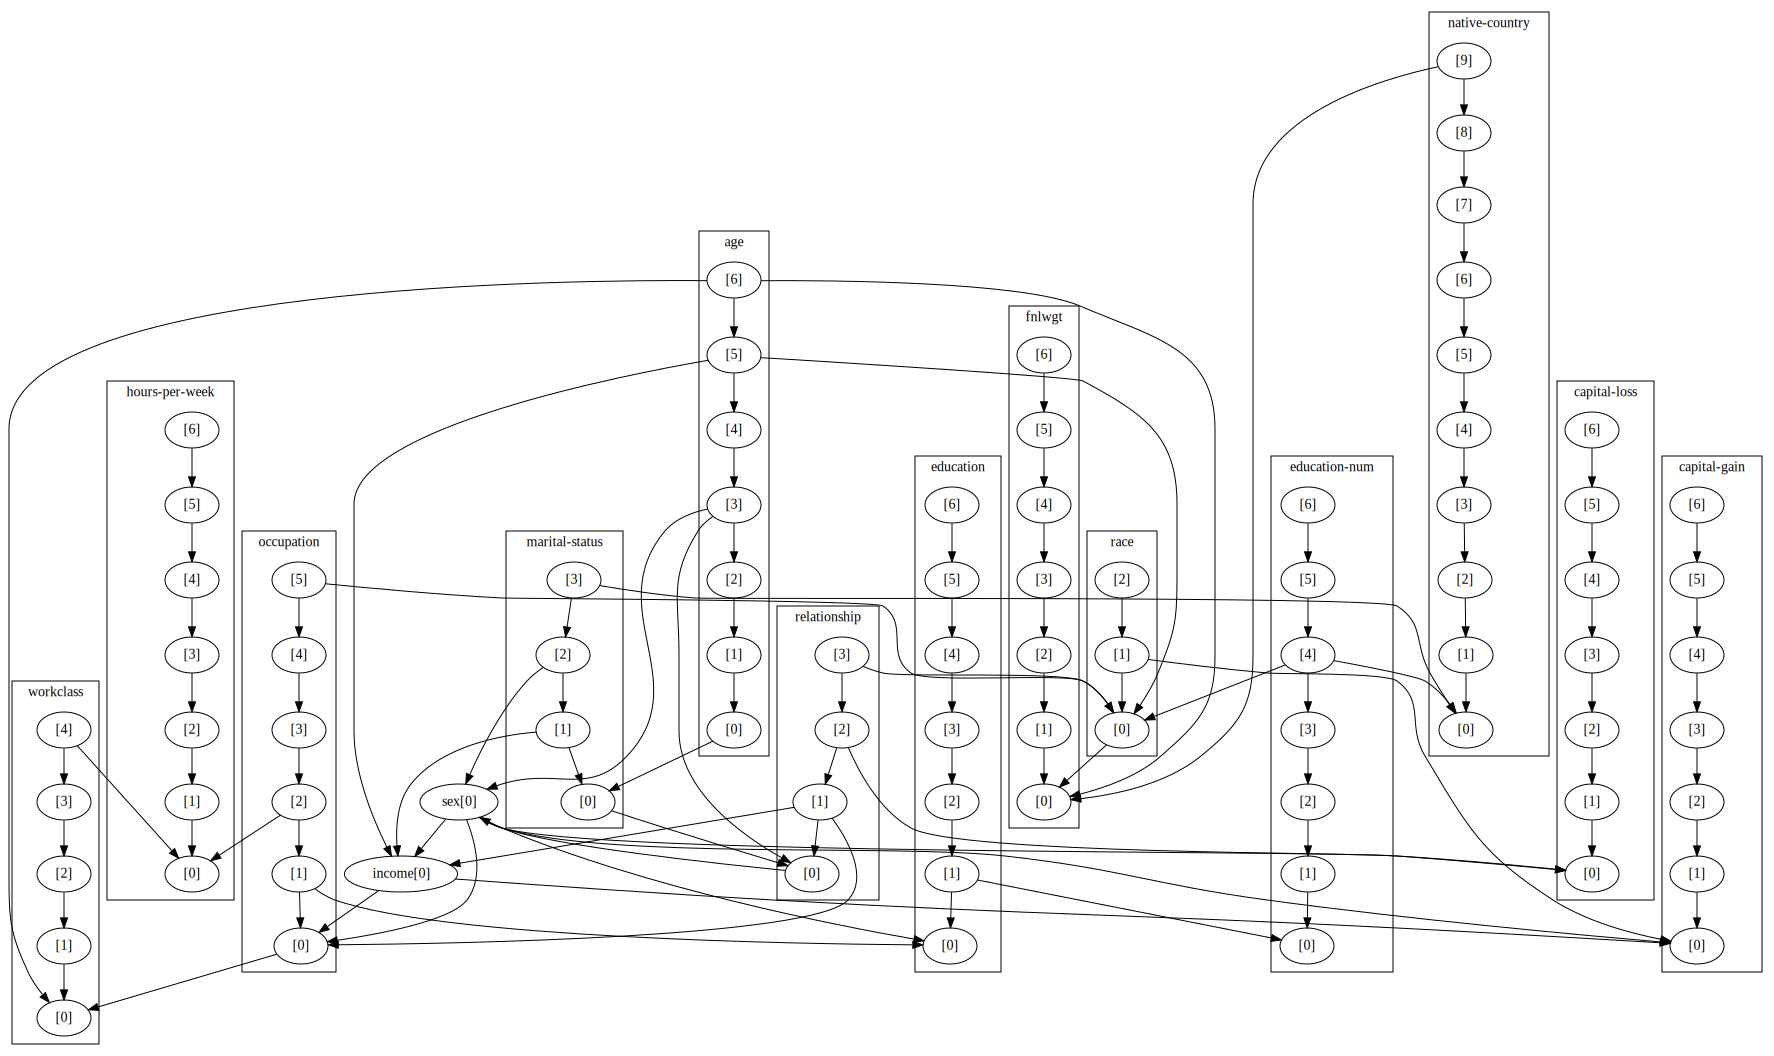

In [ ]:
g = derive_graph_from_nodes(m.nodes, m.table_attrs, prune=False)

enchanced_display(g)

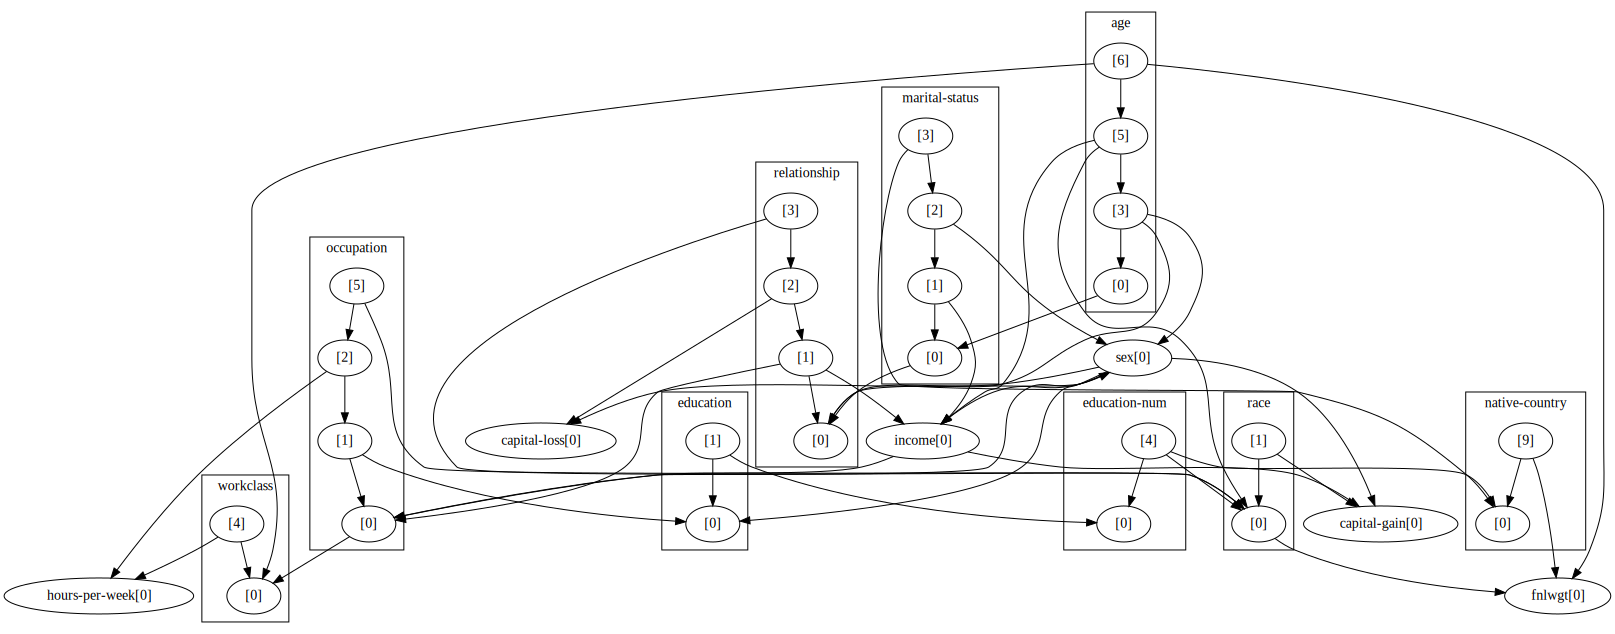

In [ ]:
g = derive_graph_from_nodes(m.nodes, m.table_attrs, prune=True)

enchanced_display(g)

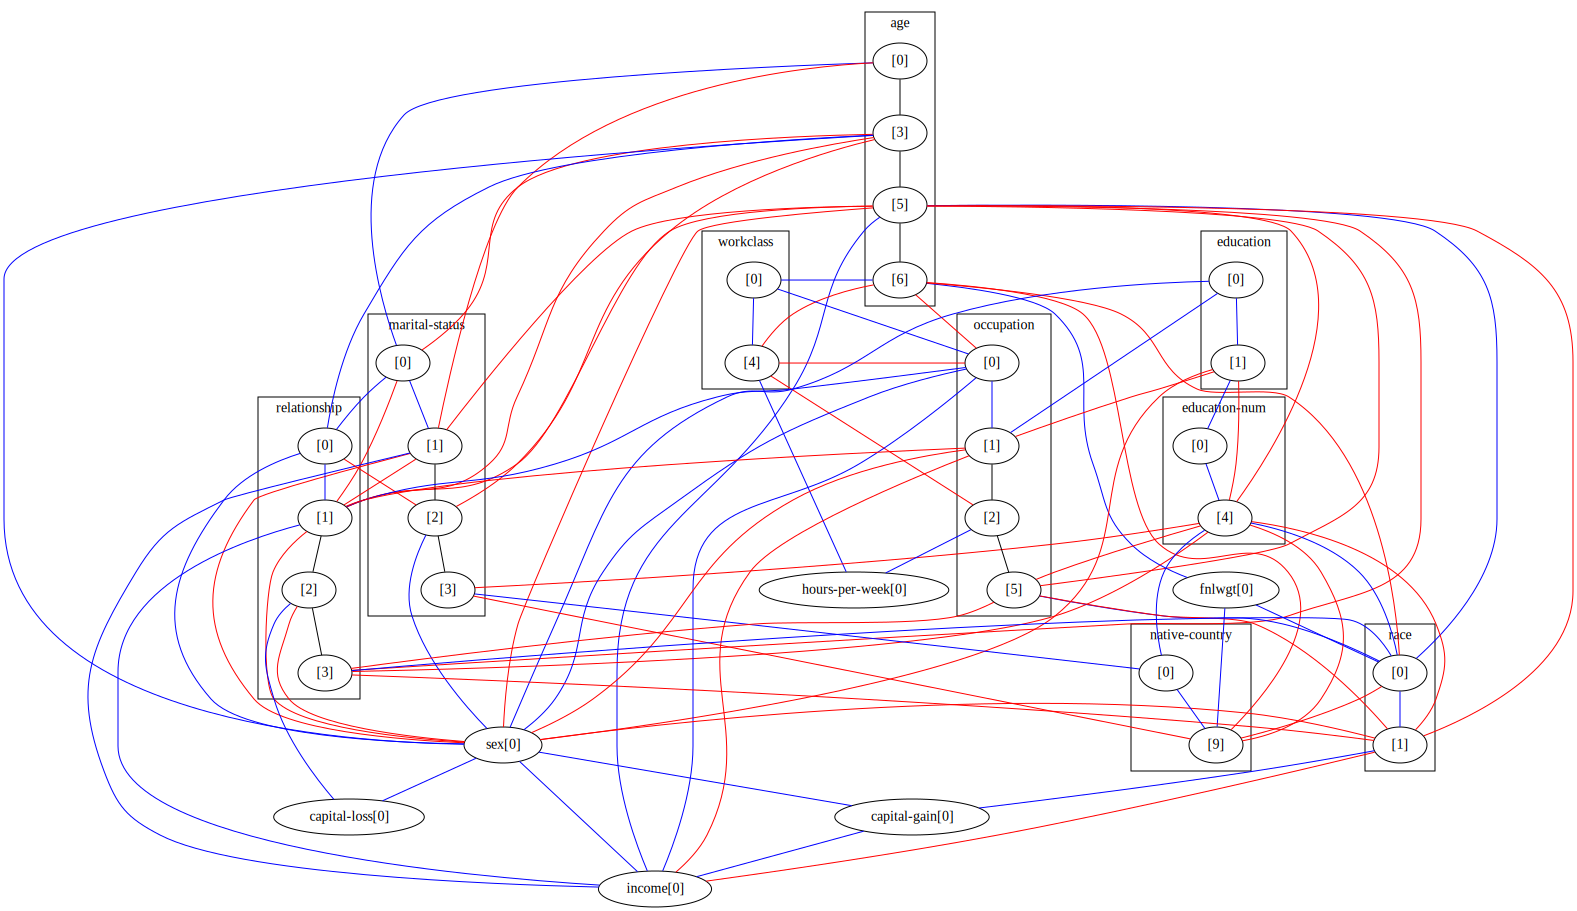

In [ ]:
mg = to_moral(g)
enchanced_display(mg)

In [ ]:
find_elim_order(mg, m.table_attrs, 10)


(
    [
        'native-country.native-country[0]',
        'marital-status.marital-status[2]',
        'age.age[0]',
        'relationship.relationship[2]',
        'workclass.workclass[0]',
        'education-num.education-num[0]',
        'hours-per-week.hours-per-week[0]',
        'capital-loss.capital-loss[0]',
        'occupation.occupation[2]',
        'workclass.workclass[4]',
        'age.age[3]',
        'education.education[0]',
        'fnlwgt.fnlwgt[0]',
        'relationship.relationship[0]',
        'capital-gain.capital-gain[0]',
        'occupation.occupation[0]',
        'native-country.native-country[9]',
        'relationship.relationship[1]',
        'income.income[0]',
        'race.race[0]',
        'age.age[5]',
        'race.race[1]',
        'age.age[6]',
        'relationship.relationship[3]',
        'marital-status.marital-status[0]',
        'marital-status.marital-status[1]',
        'marital-status.marital-status[3]',
        'occupation.occupation[5]',

In [ ]:
# %lprun -f elimination_order_greedy elimination_order_greedy(to_moral(g), m.table_attrs)

In [ ]:
%timeit elimination_order_greedy(to_moral(g), m.table_attrs)

38.5 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


INFO     Removing node `native-country.native-country[0]` with cost: 20                                                      base.py:95


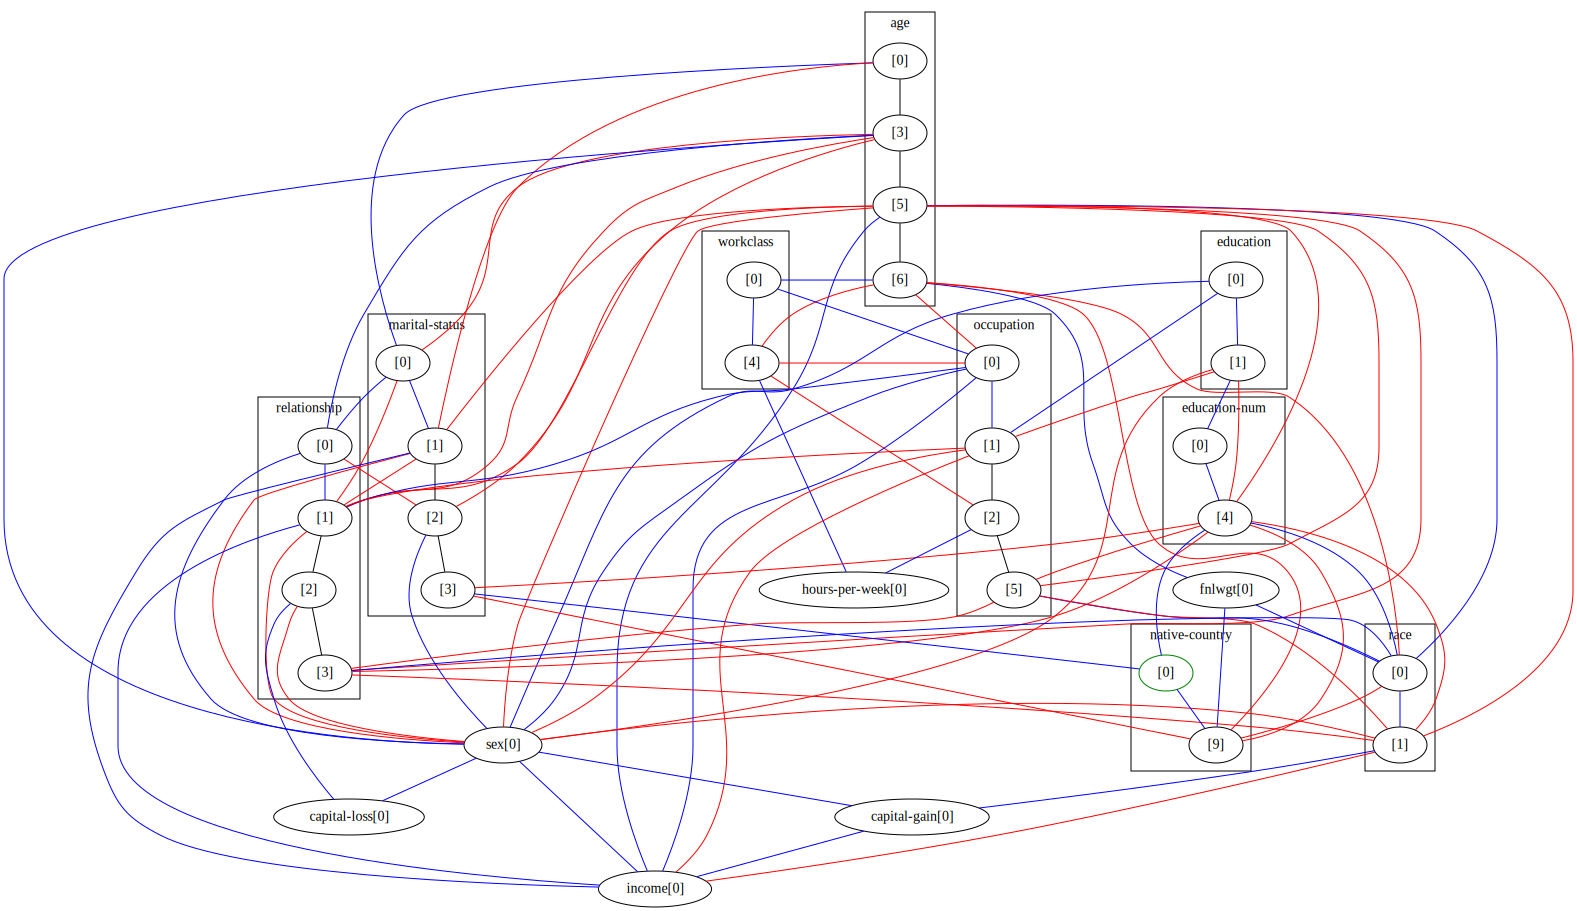

INFO     Removing node `marital-status.marital-status[3]` with cost: 40                                                      base.py:95


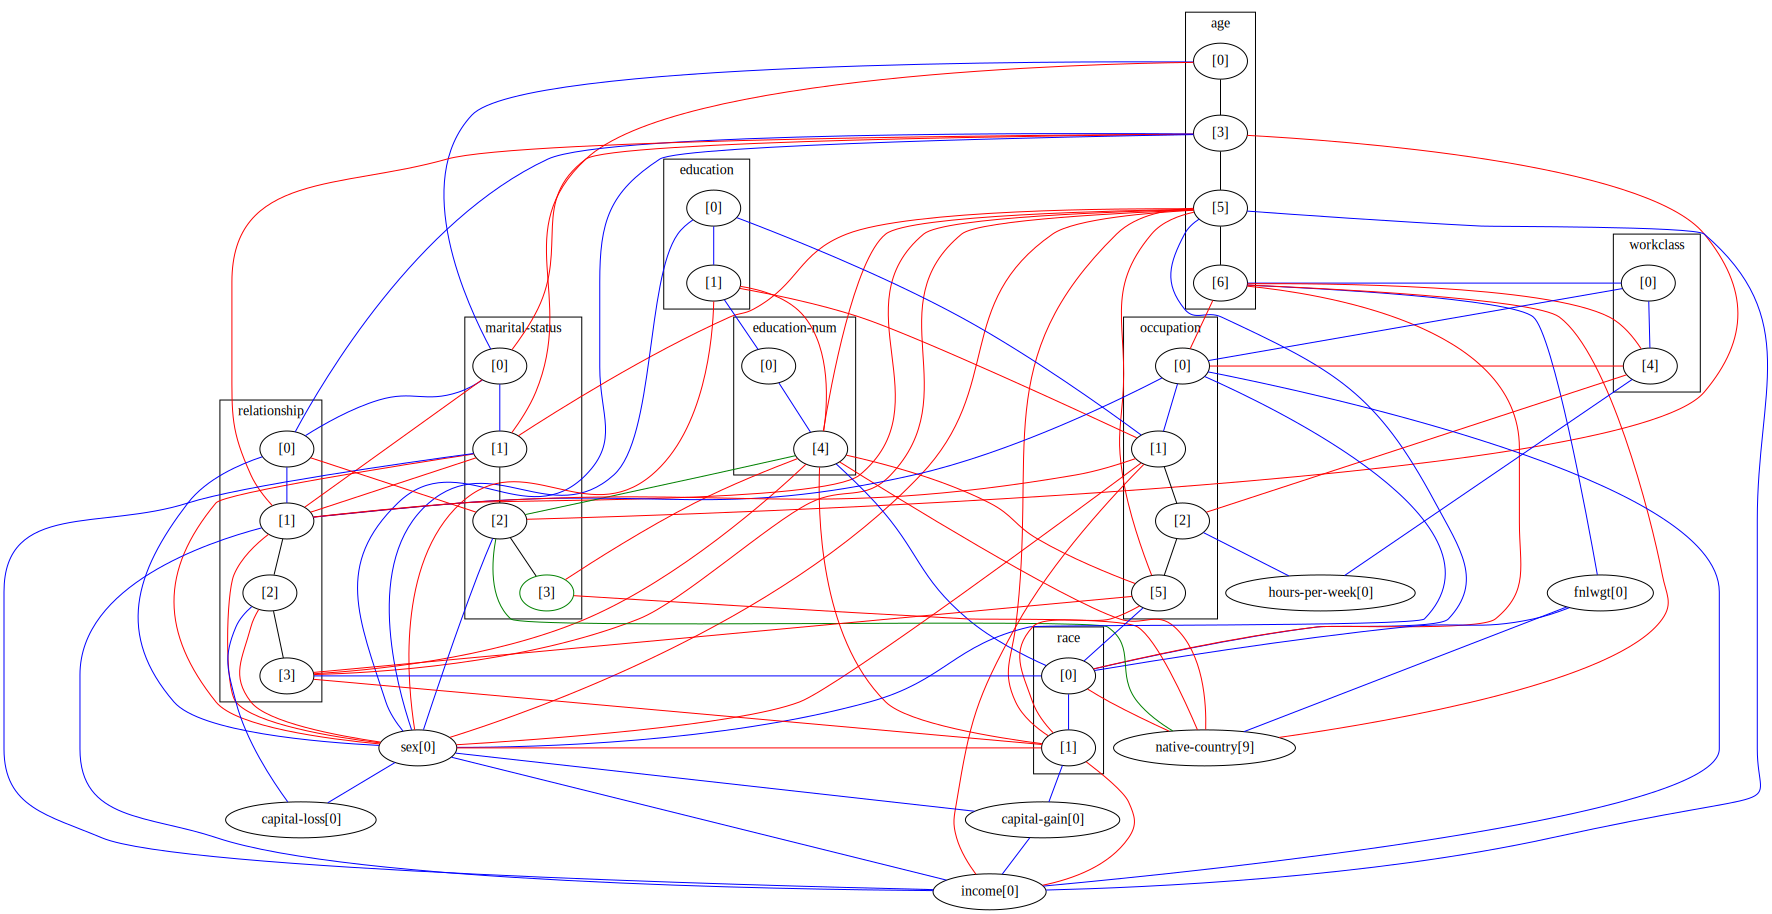

INFO     Removing node `age.age[0]` with cost: 56                                                                            base.py:95


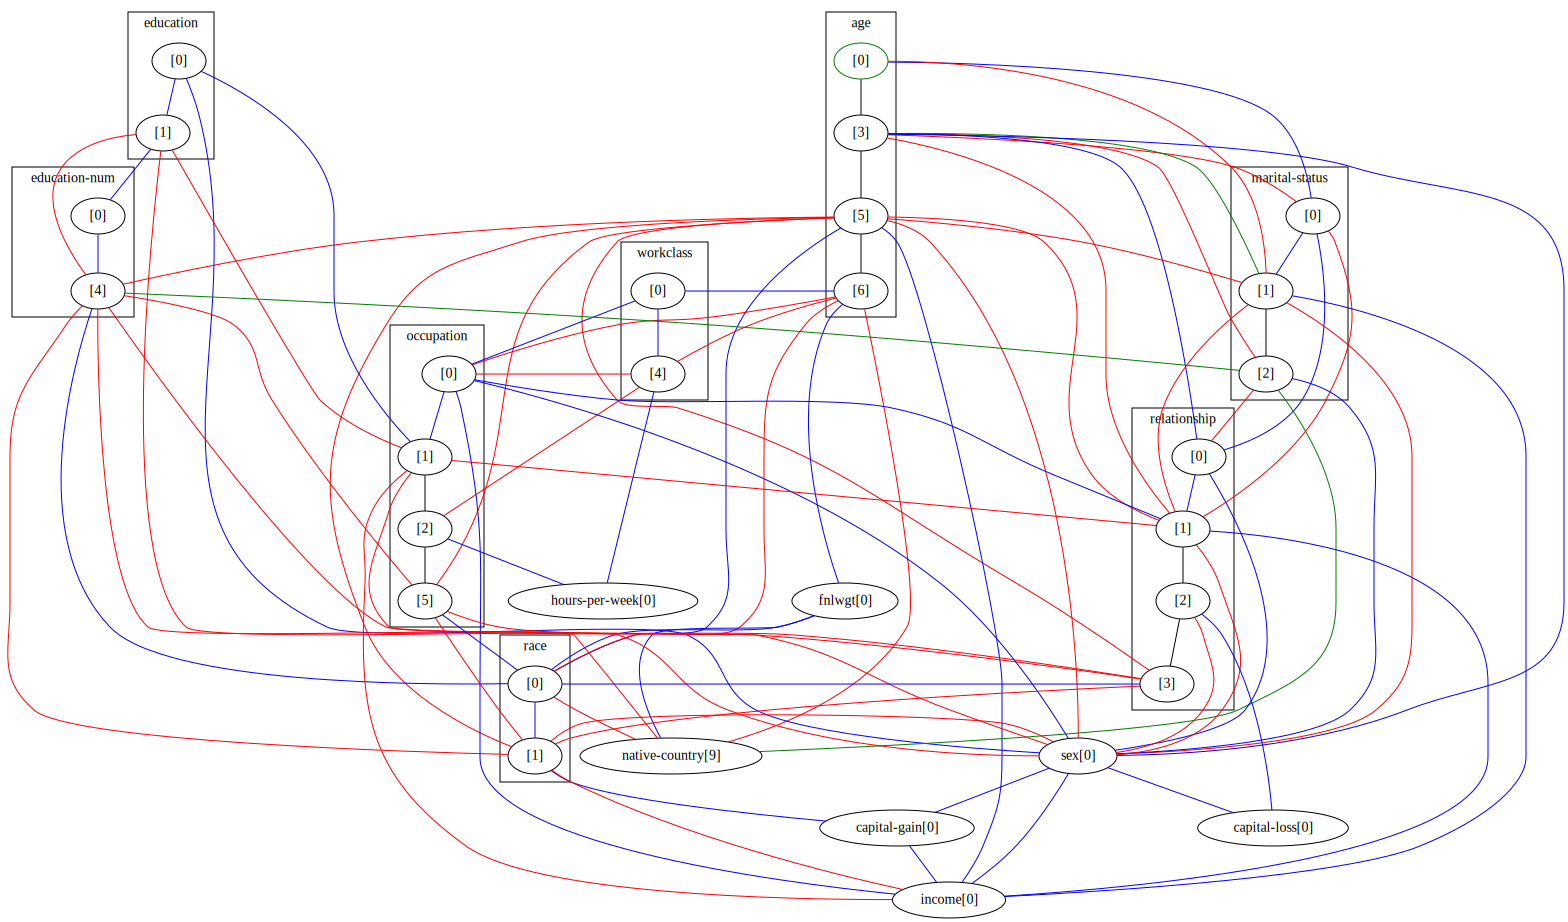

INFO     Removing node `education-num.education-num[0]` with cost: 80                                                        base.py:95


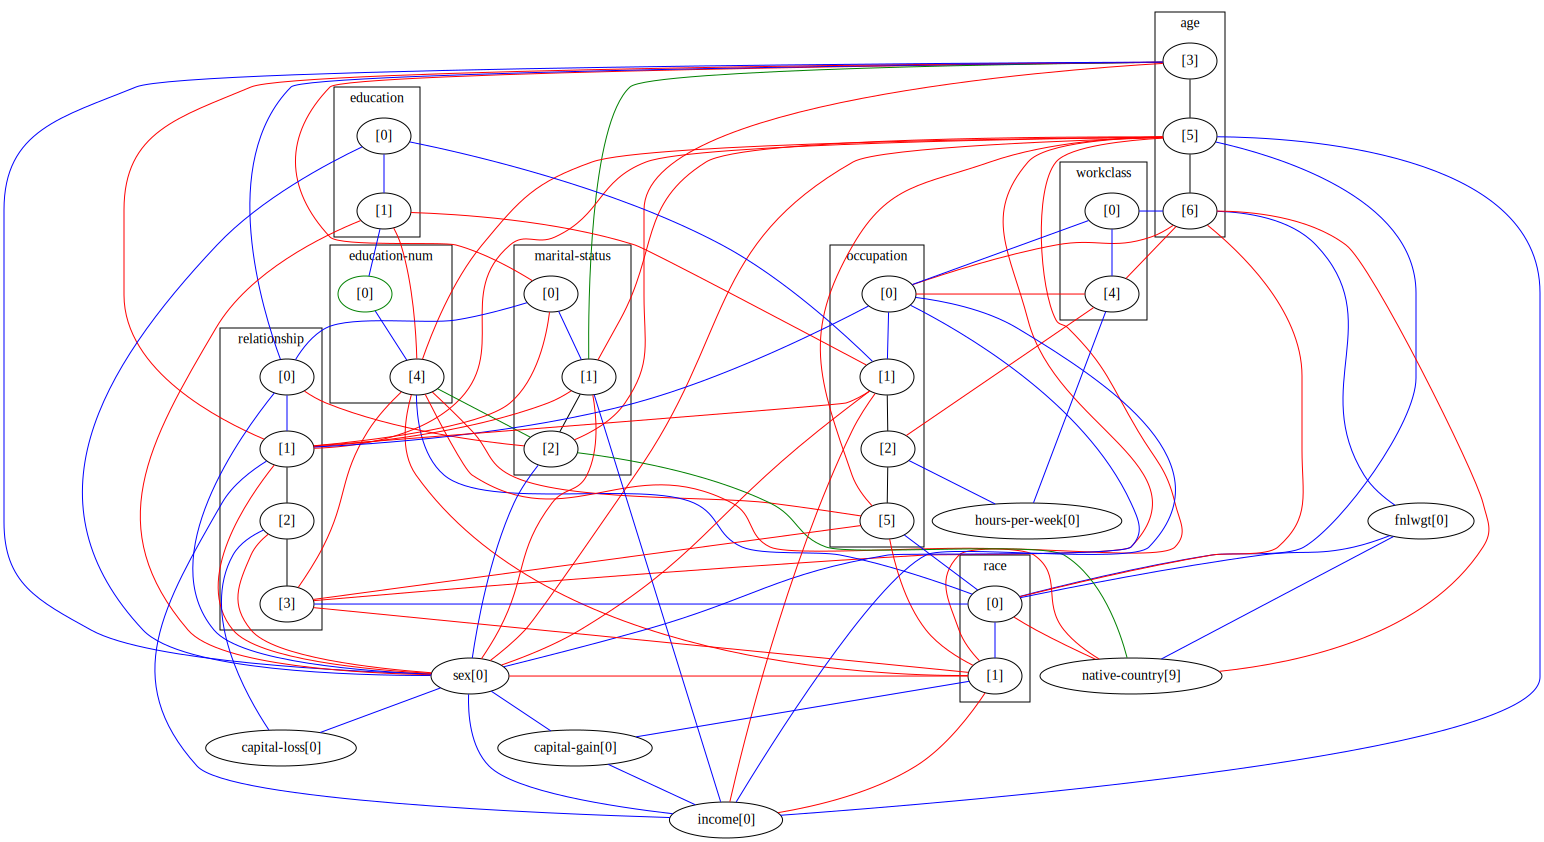

INFO     Removing node `relationship.relationship[2]` with cost: 160                                                         base.py:95


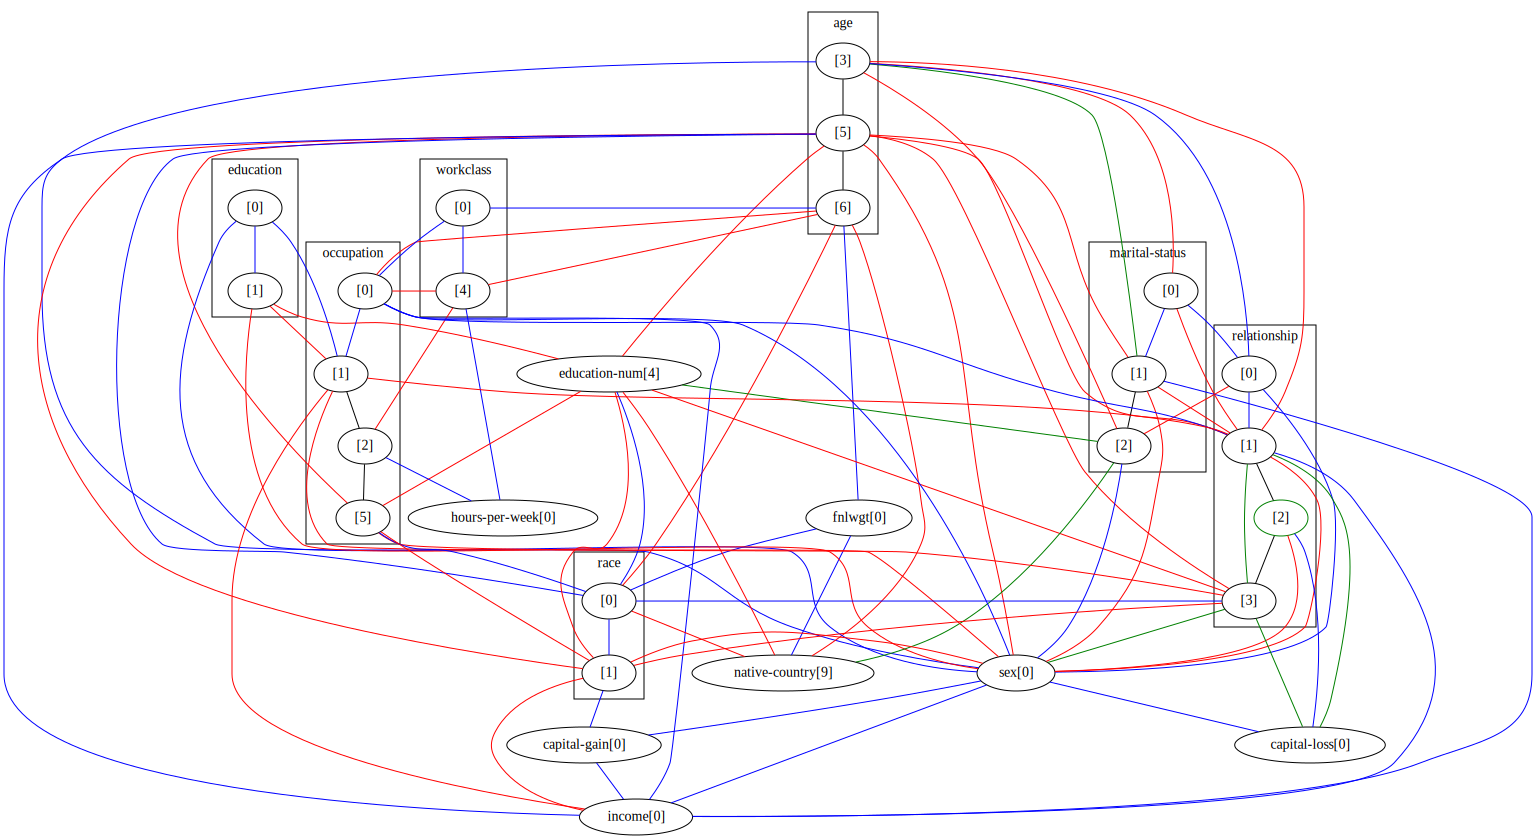

INFO     Removing node `capital-loss.capital-loss[0]` with cost: 80                                                          base.py:95


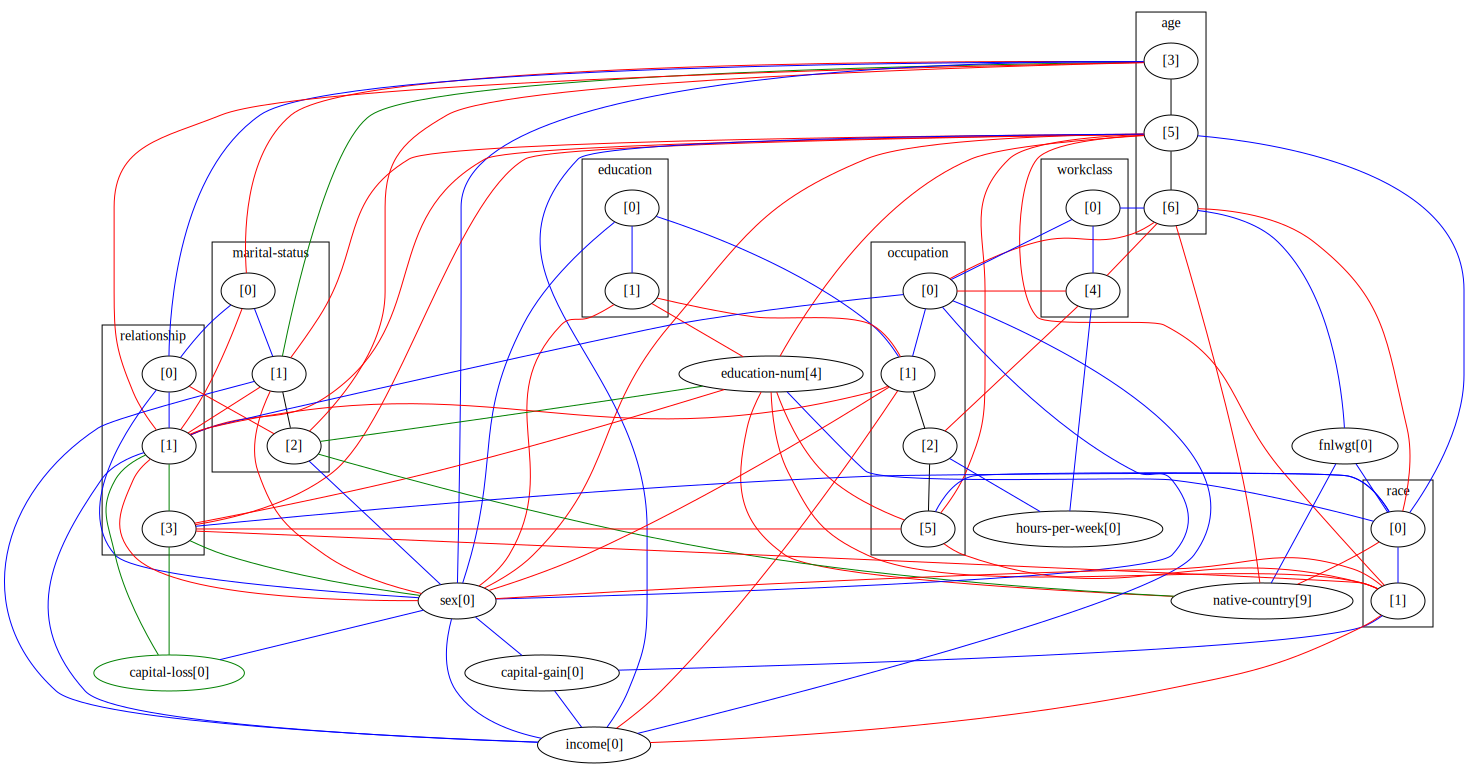

INFO     Removing node `workclass.workclass[0]` with cost: 270                                                               base.py:95


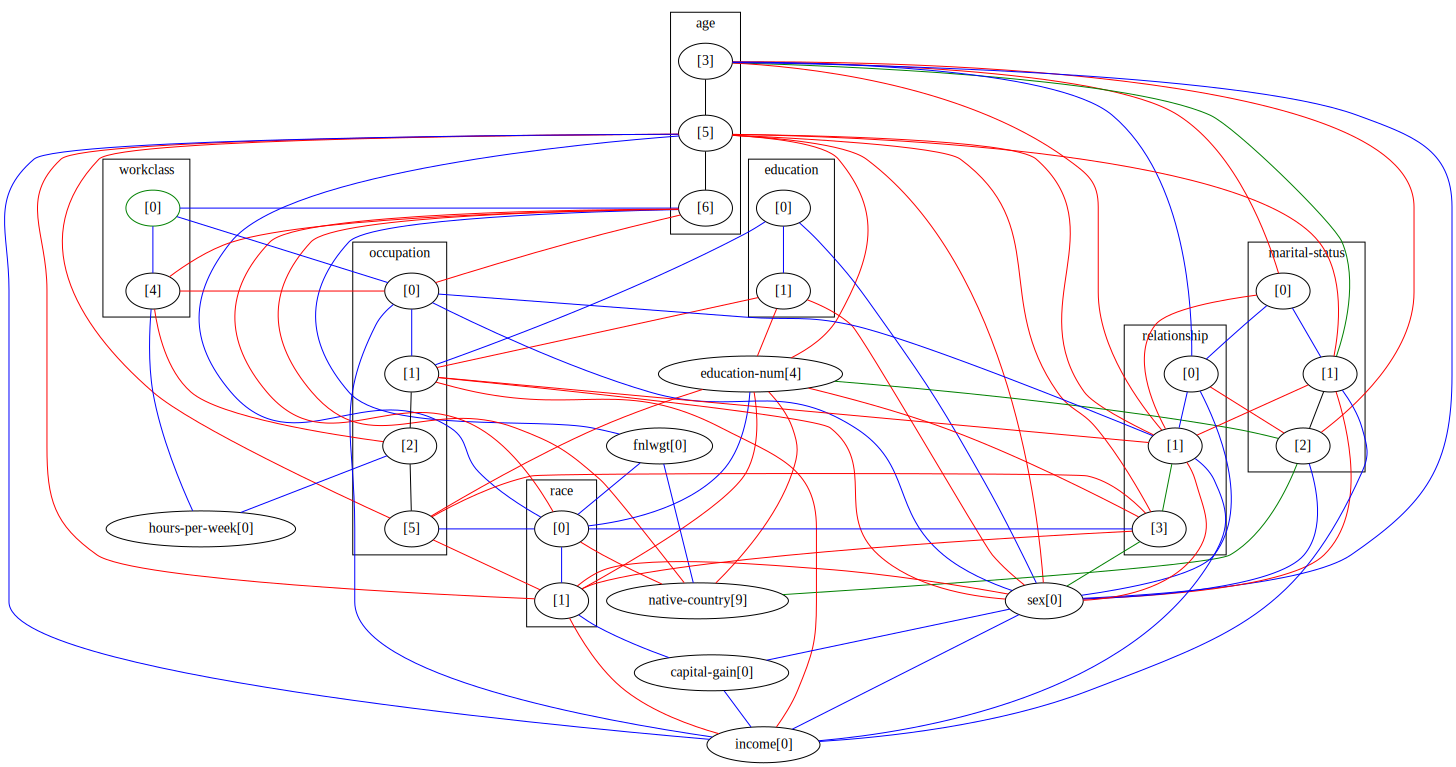

INFO     Removing node `marital-status.marital-status[0]` with cost: 280                                                     base.py:95


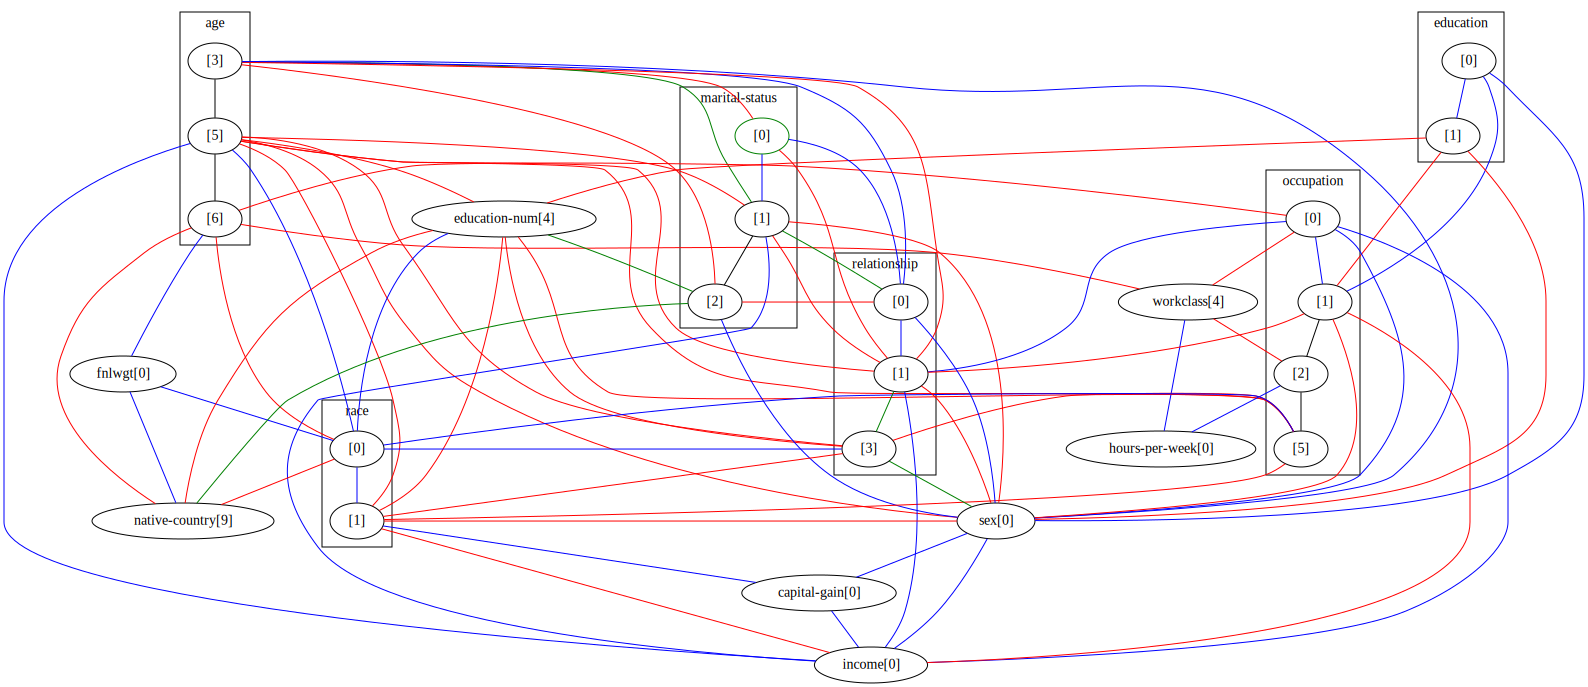

INFO     Removing node `age.age[3]` with cost: 320                                                                           base.py:95


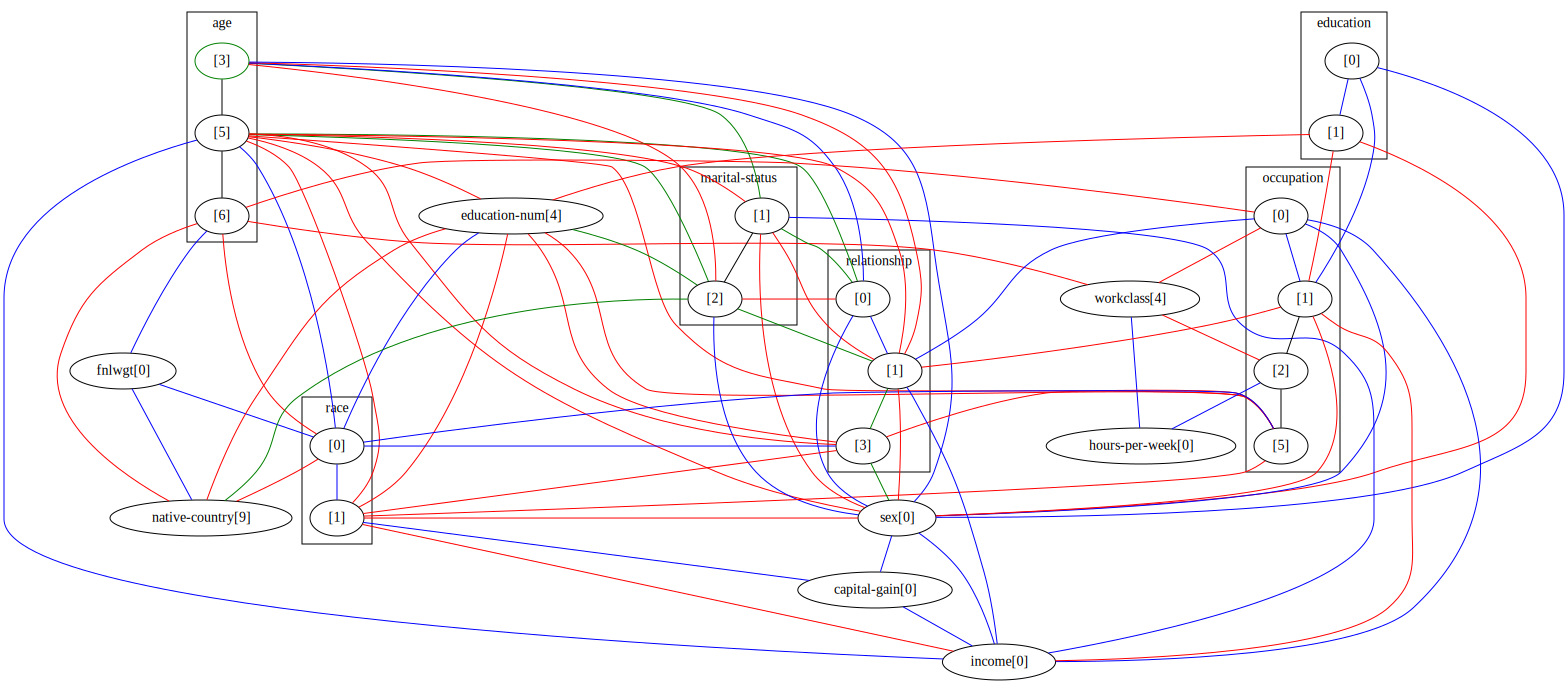

INFO     Removing node `relationship.relationship[0]` with cost: 160                                                         base.py:95


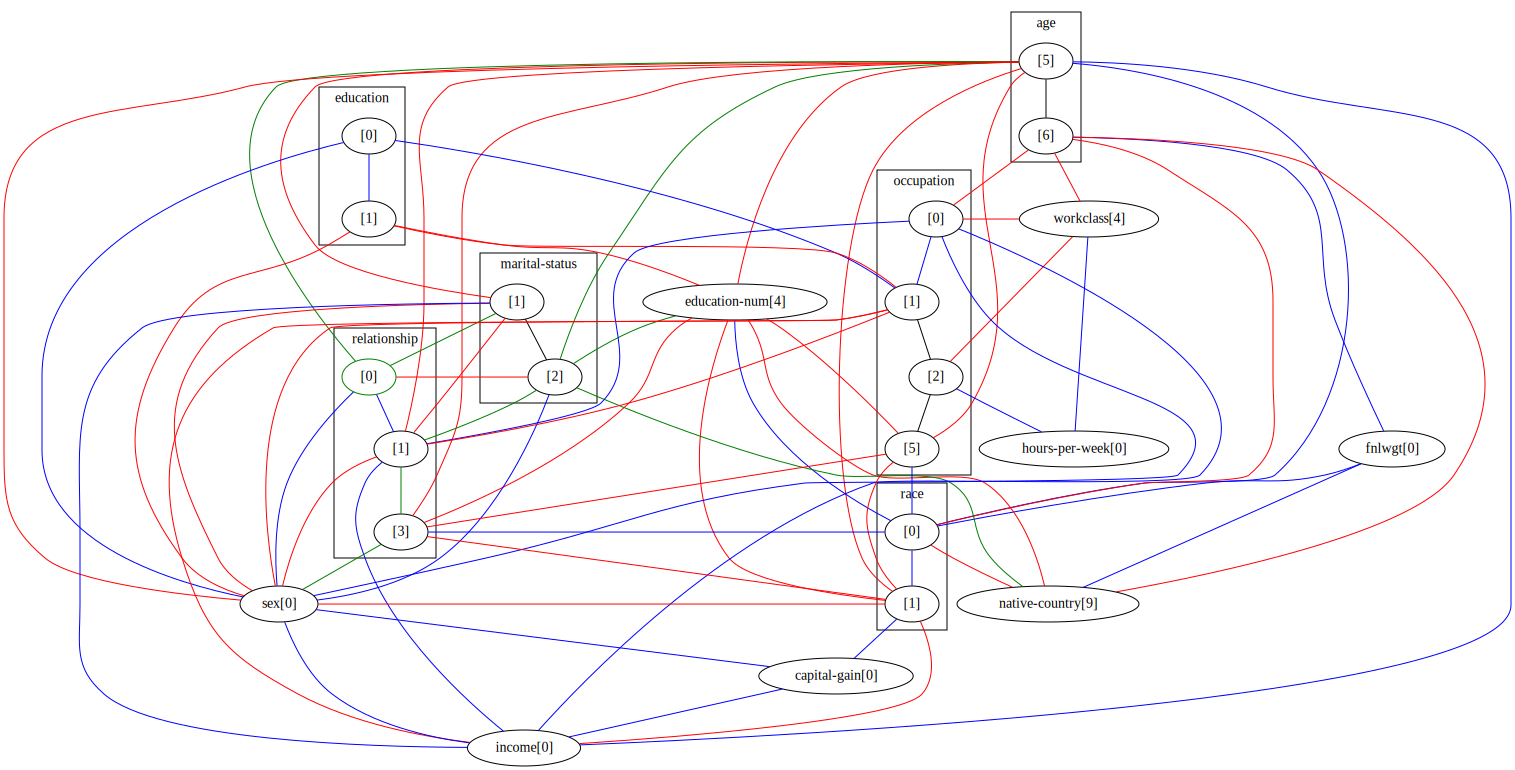

INFO     Removing node `marital-status.marital-status[1]` with cost: 320                                                     base.py:95


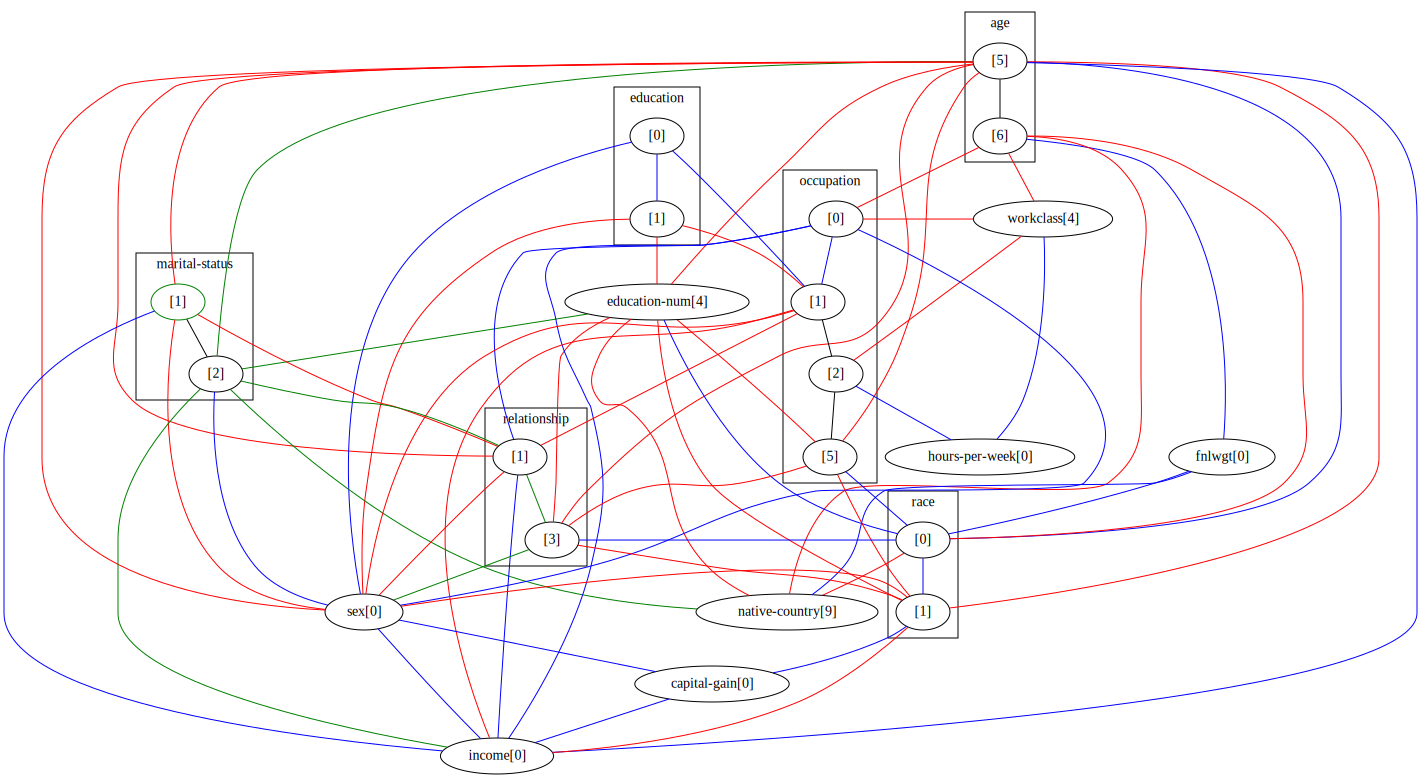

INFO     Removing node `occupation.occupation[2]` with cost: 320                                                             base.py:95


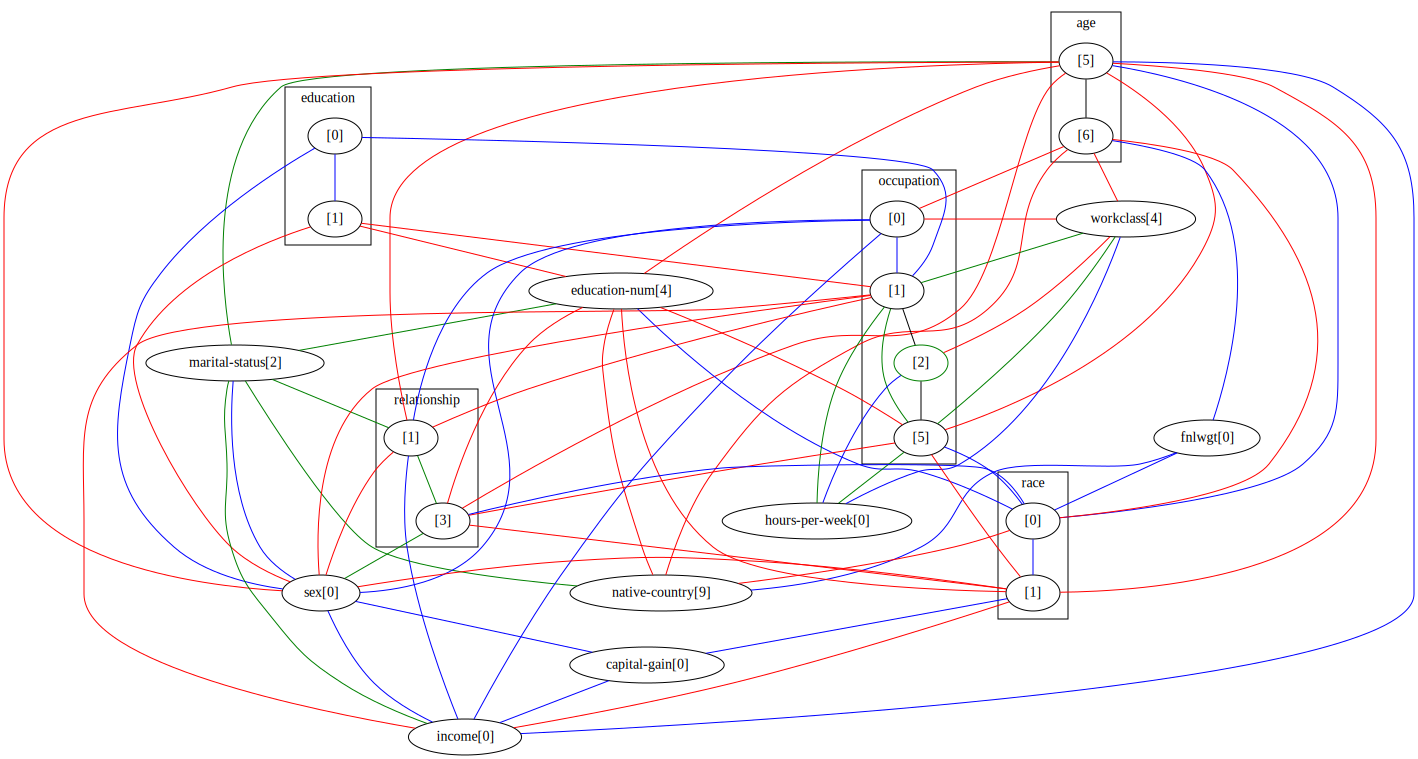

INFO     Removing node `workclass.workclass[4]` with cost: 160                                                               base.py:95


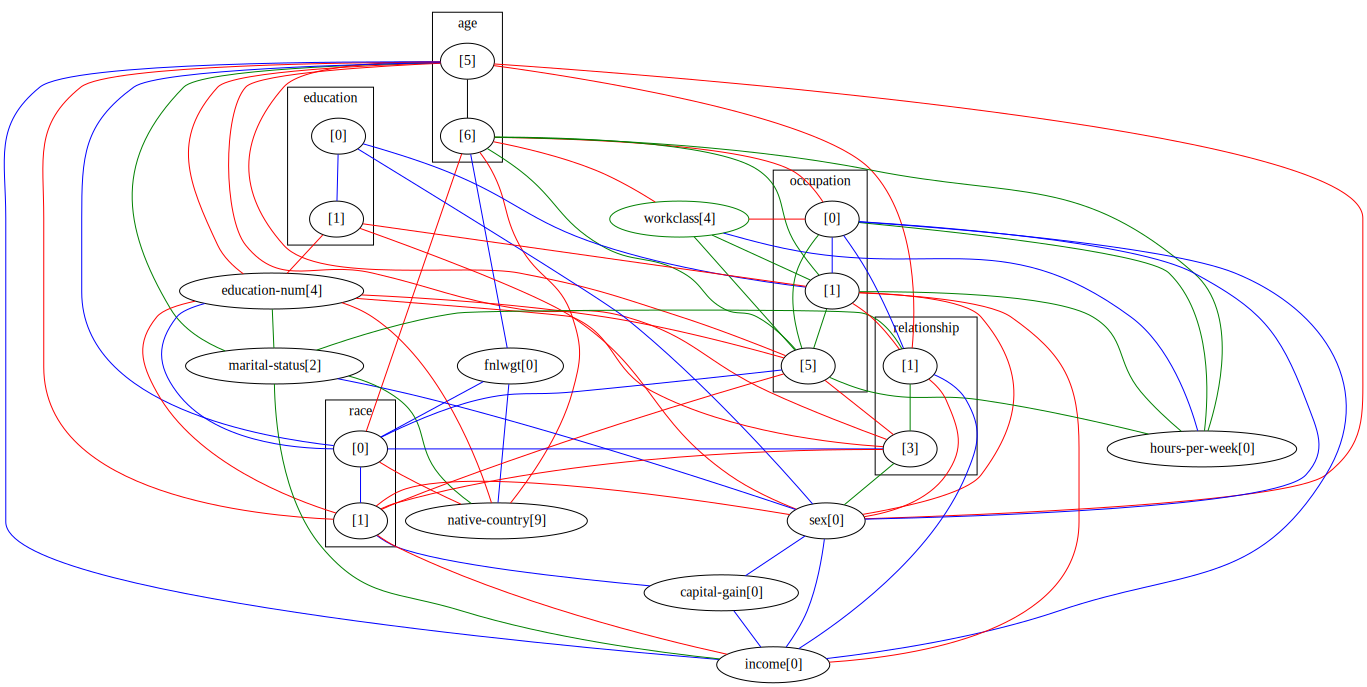

INFO     Removing node `hours-per-week.hours-per-week[0]` with cost: 80                                                      base.py:95


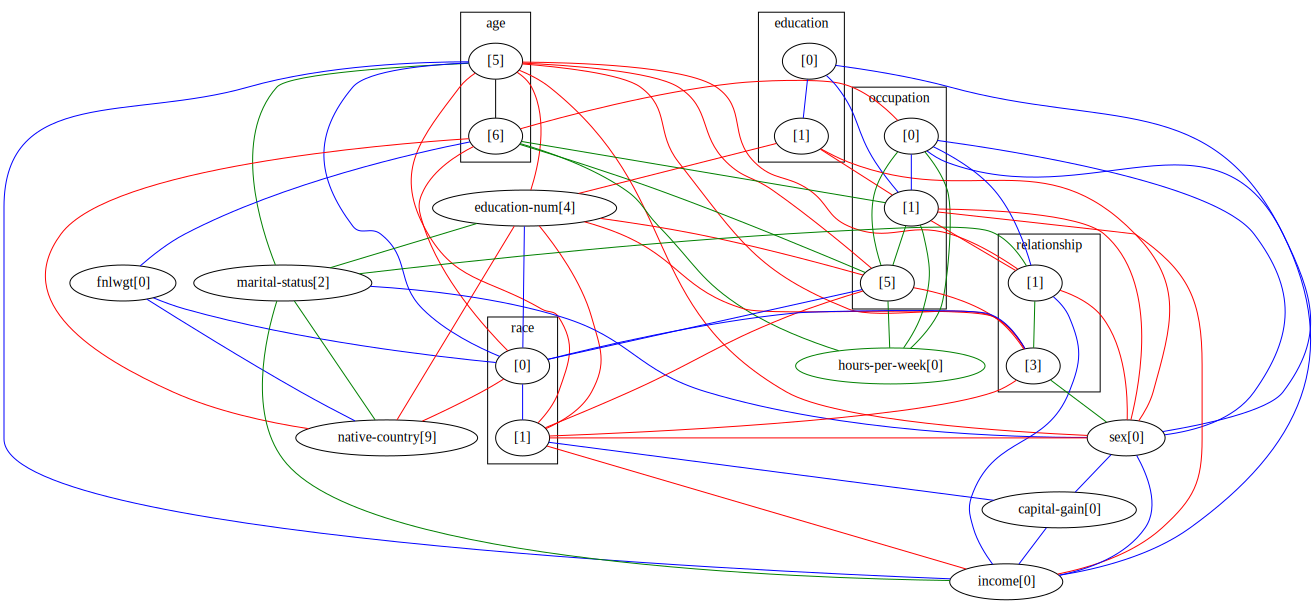

INFO     Removing node `occupation.occupation[0]` with cost: 80                                                              base.py:95


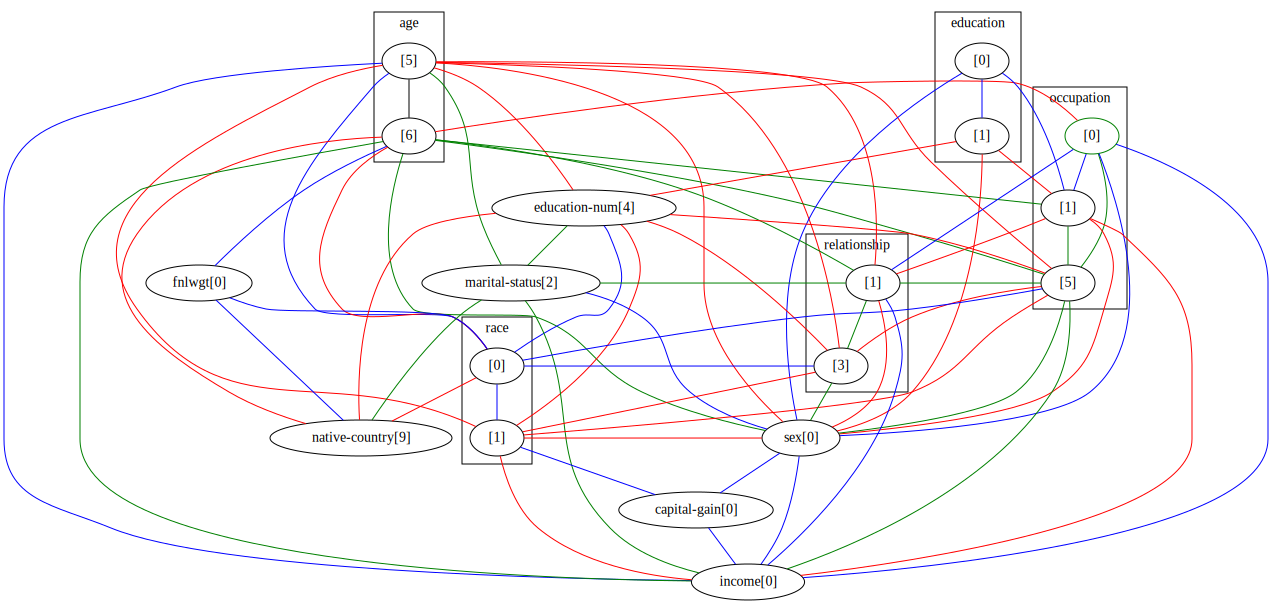

INFO     Removing node `capital-gain.capital-gain[0]` with cost: 320                                                         base.py:95


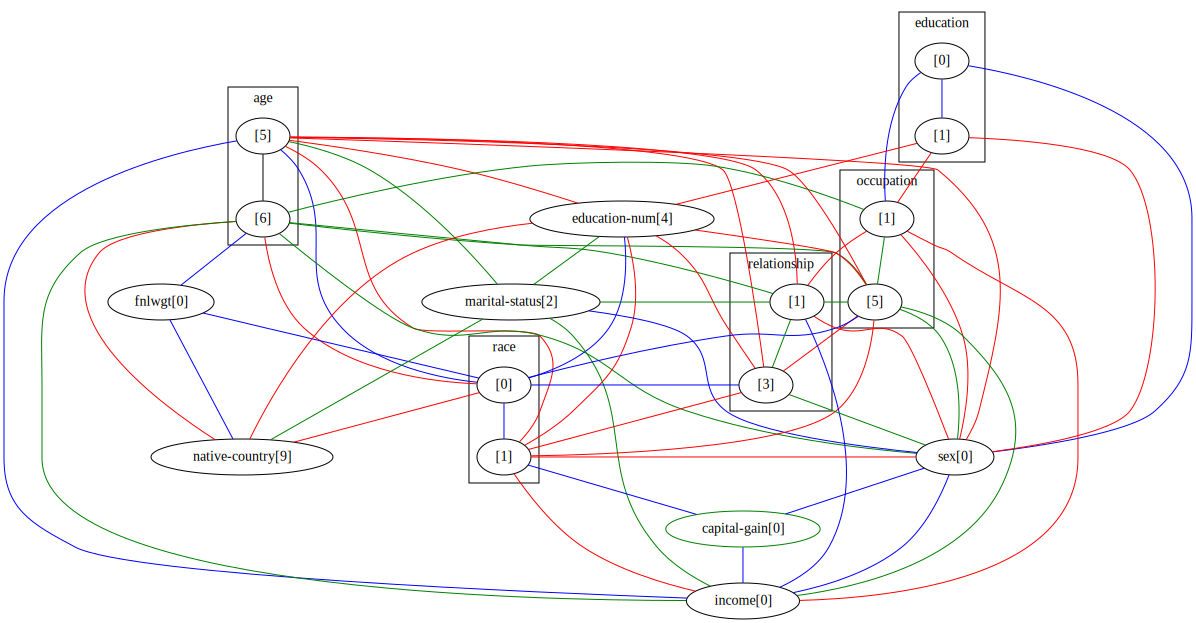

INFO     Removing node `education.education[0]` with cost: 384                                                               base.py:95


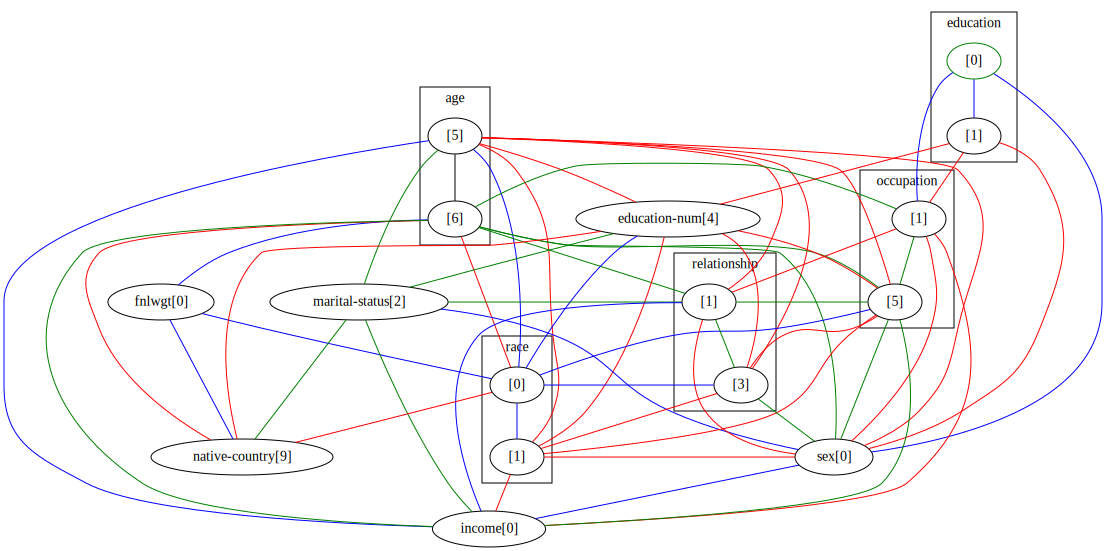

INFO     Removing node `fnlwgt.fnlwgt[0]` with cost: 400                                                                     base.py:95


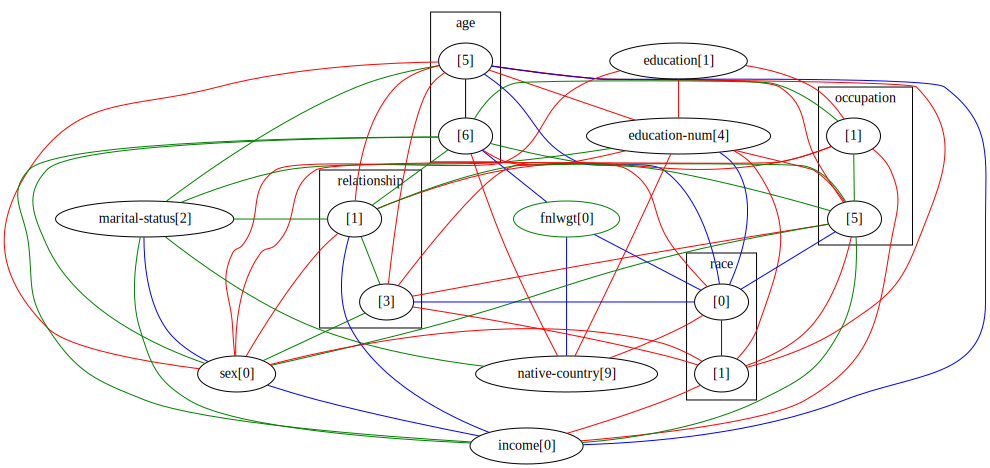

INFO     Removing node `native-country.native-country[9]` with cost: 400                                                     base.py:95


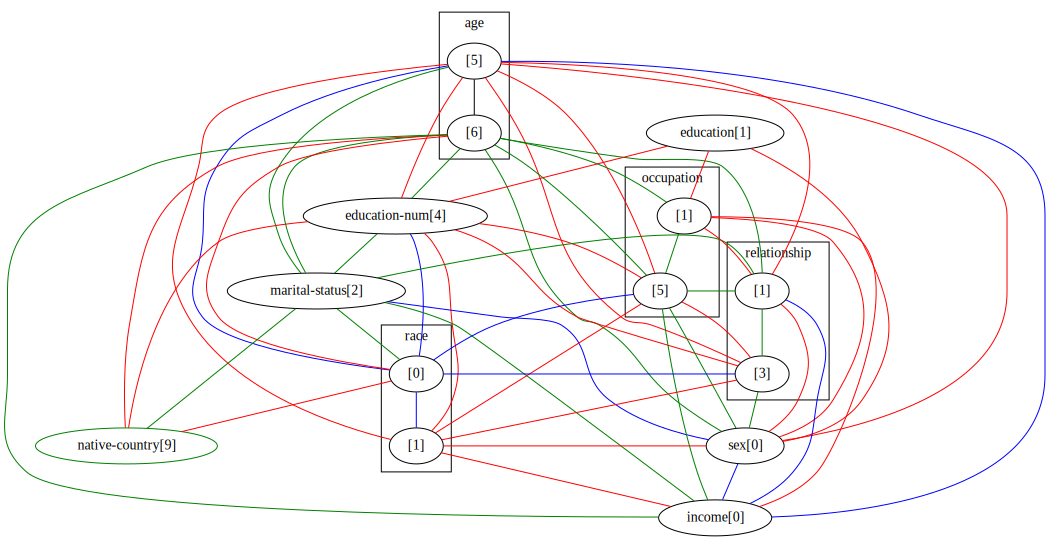

INFO     Removing node `relationship.relationship[1]` with cost: 640                                                         base.py:95


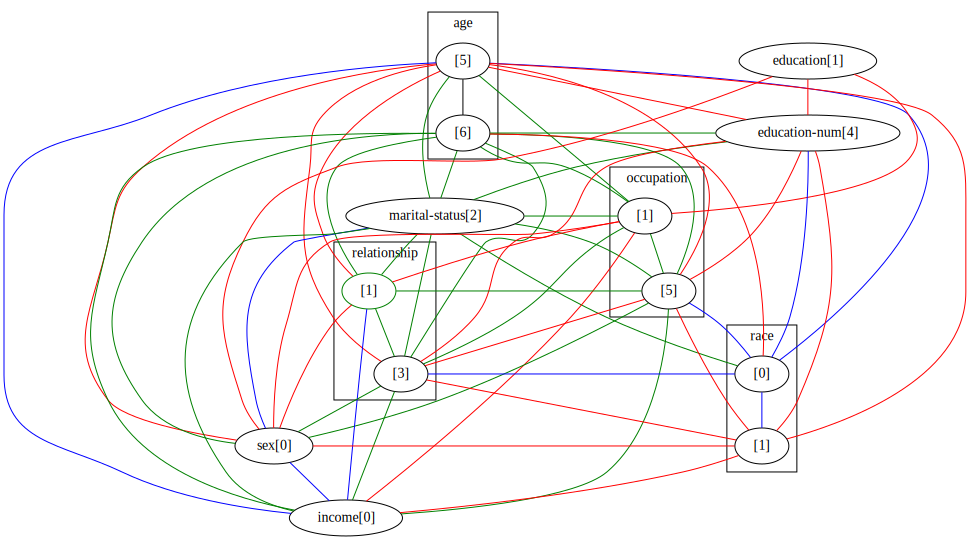

INFO     Removing node `income.income[0]` with cost: 1_024                                                                   base.py:95


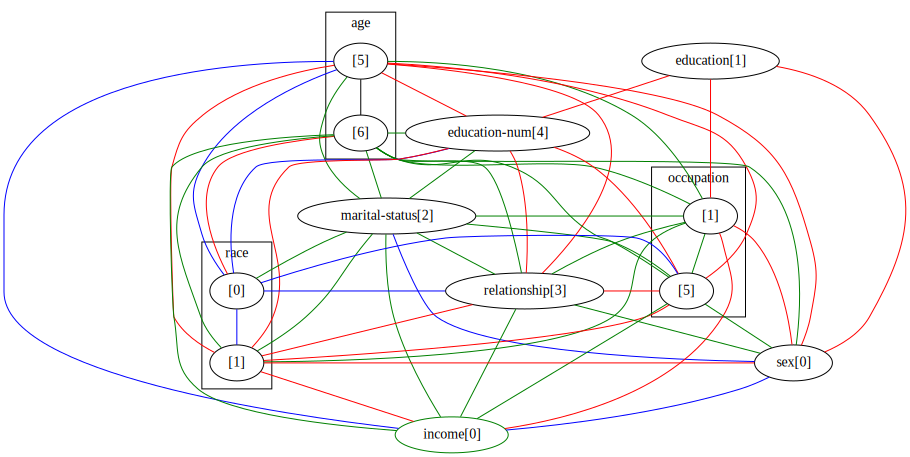

INFO     Removing node `race.race[0]` with cost: 1_280                                                                       base.py:95


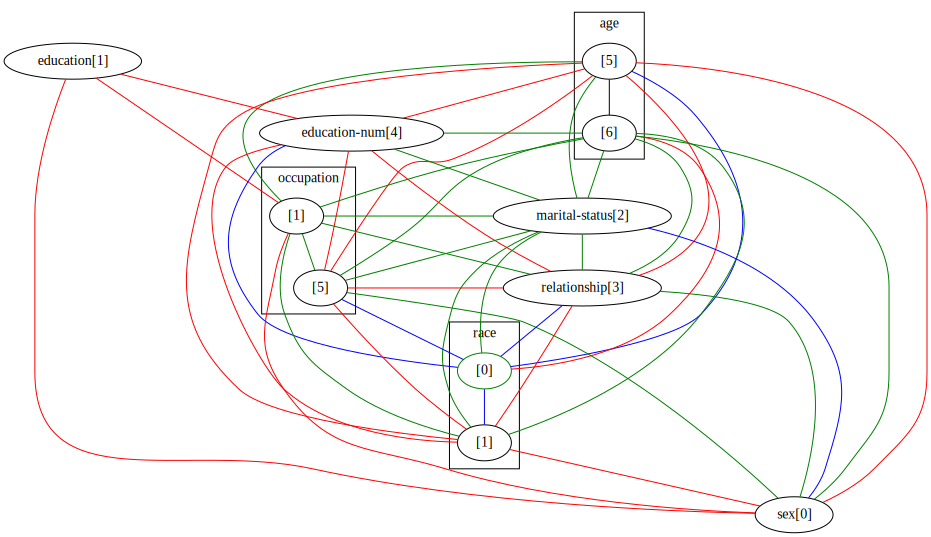

INFO     Removing node `education.education[1]` with cost: 1_920                                                             base.py:95


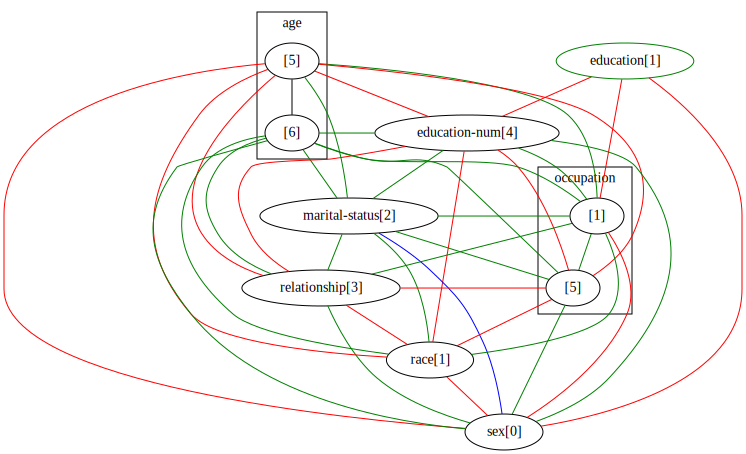

INFO     Removing node `age.age[5]` with cost: 2_560                                                                         base.py:95


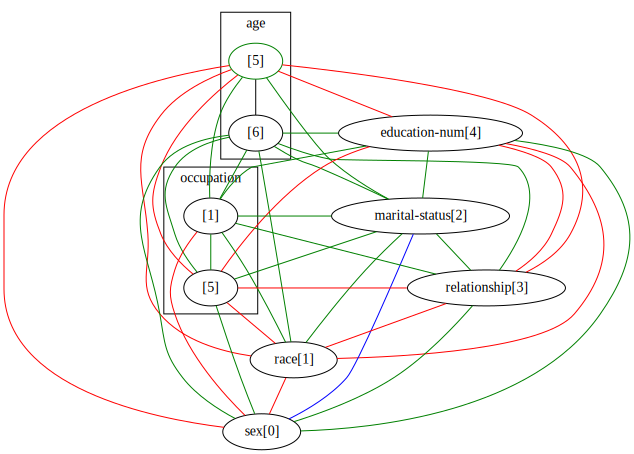

INFO     Removing node `age.age[6]` with cost: 1_280                                                                         base.py:95


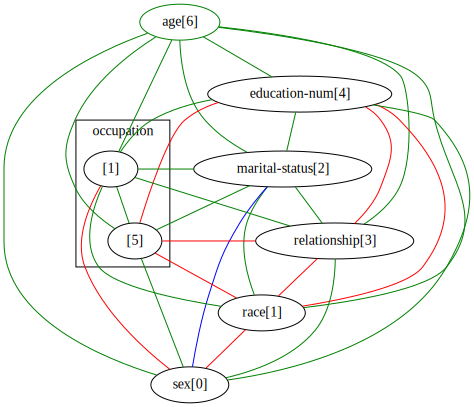

INFO     Removing node `education-num.education-num[4]` with cost: 640                                                       base.py:95


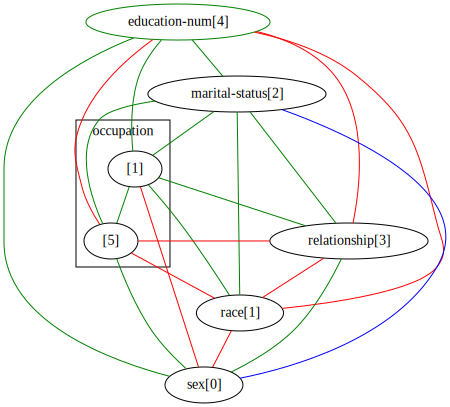

INFO     Removing node `marital-status.marital-status[2]` with cost: 128                                                     base.py:95


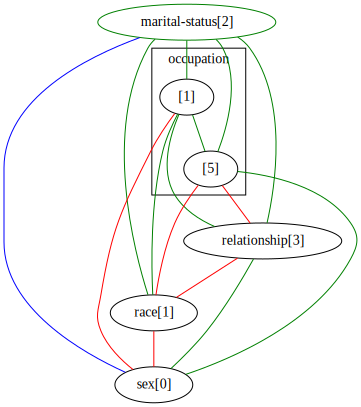

INFO     Removing node `occupation.occupation[1]` with cost: 32                                                              base.py:95


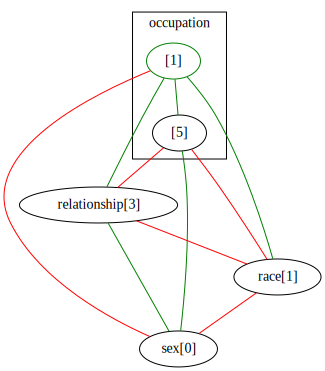

INFO     Removing node `occupation.occupation[5]` with cost: 32                                                              base.py:95


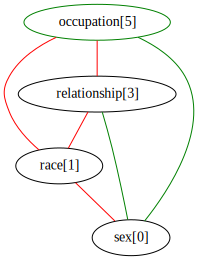

INFO     Removing node `relationship.relationship[3]` with cost: 16                                                          base.py:95


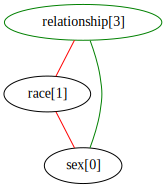

INFO     Removing node `race.race[1]` with cost: 8                                                                           base.py:95


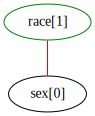

INFO     Removing node `sex.sex[0]` with cost: 2                                                                             base.py:95


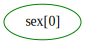

INFO     Final cordal graph with cost 13492:                                                                                base.py:102


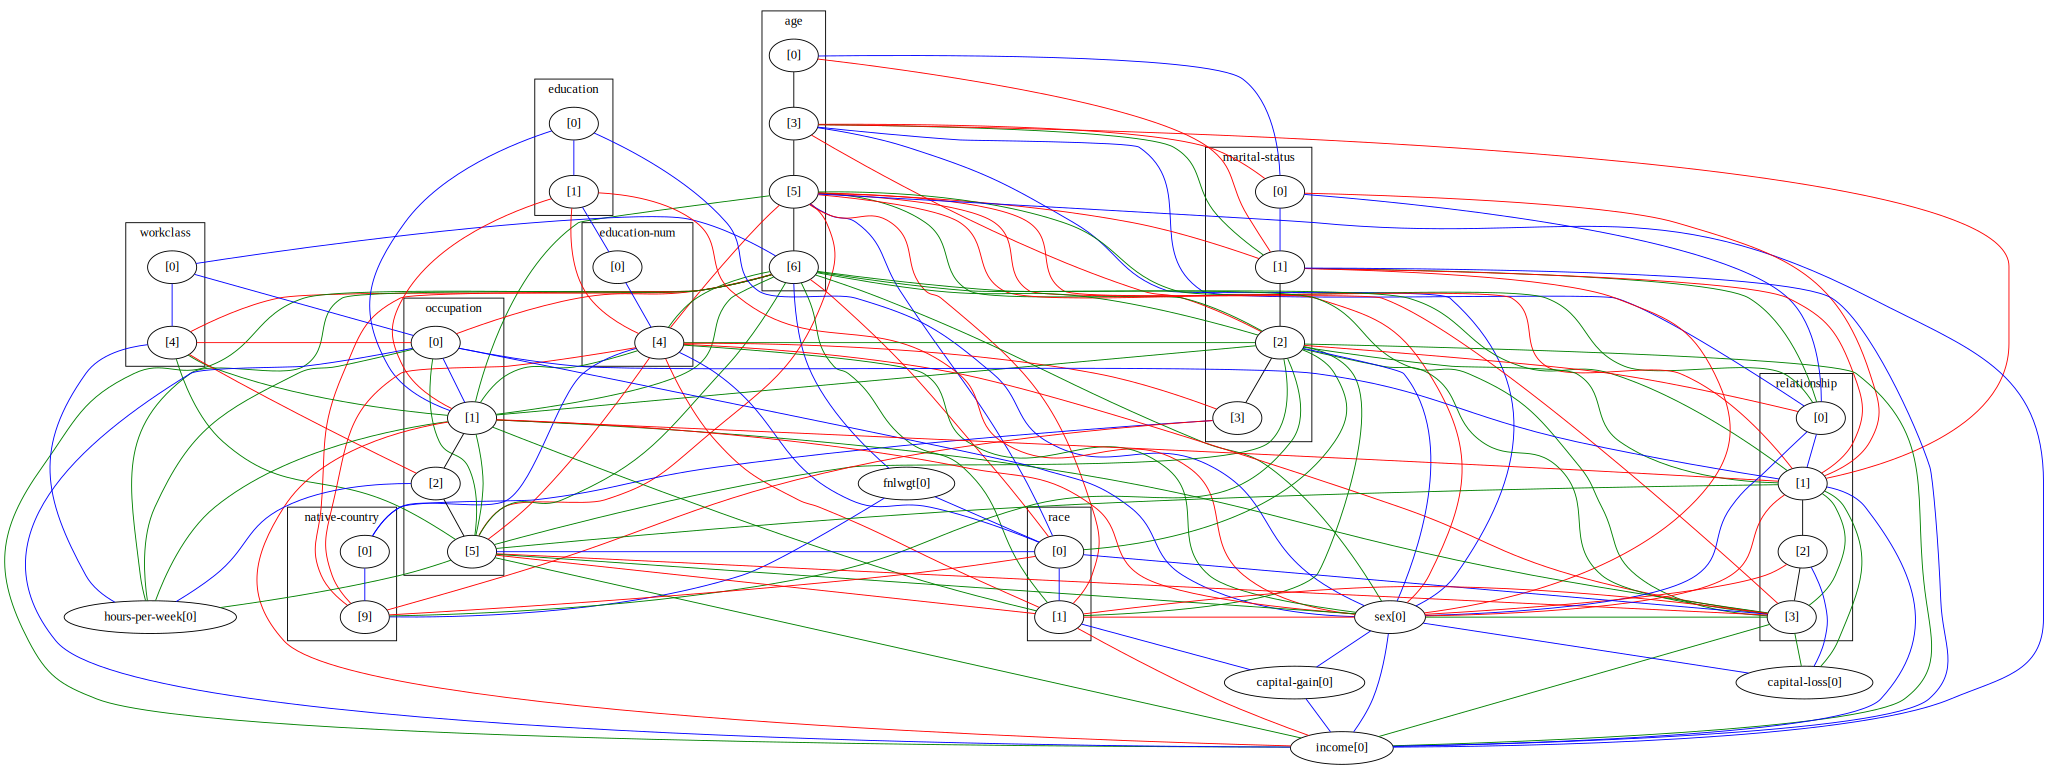

INFO     Elimination order:                                                                                                 base.py:104
         ['native-country.native-country[0]', 'marital-status.marital-status[3]', 'age.age[0]',                                        
         'education-num.education-num[0]', 'relationship.relationship[2]', 'capital-loss.capital-loss[0]',                             
         'workclass.workclass[0]', 'marital-status.marital-status[0]', 'age.age[3]', 'relationship.relationship[0]',                   
         'marital-status.marital-status[1]', 'occupation.occupation[2]', 'workclass.workclass[4]',                                     
         'hours-per-week.hours-per-week[0]', 'occupation.occupation[0]', 'capital-gain.capital-gain[0]',                               
         'education.education[0]', 'fnlwgt.fnlwgt[0]', 'native-country.native-country[9]', 'relationship.relationship[1]',             
         'income.income[0]', 'race.race[0]', 'ed


(
    [
        'native-country.native-country[0]',
        'marital-status.marital-status[3]',
        'age.age[0]',
        'education-num.education-num[0]',
        'relationship.relationship[2]',
        'capital-loss.capital-loss[0]',
        'workclass.workclass[0]',
        'marital-status.marital-status[0]',
        'age.age[3]',
        'relationship.relationship[0]',
        'marital-status.marital-status[1]',
        'occupation.occupation[2]',
        'workclass.workclass[4]',
        'hours-per-week.hours-per-week[0]',
        'occupation.occupation[0]',
        'capital-gain.capital-gain[0]',
        'education.education[0]',
        'fnlwgt.fnlwgt[0]',
        'native-country.native-country[9]',
        'relationship.relationship[1]',
        'income.income[0]',
        'race.race[0]',
        'education.education[1]',
        'age.age[5]',
        'age.age[6]',
        'education-num.education-num[4]',
        'marital-status.marital-status[2]',
        'occupation.occ

In [ ]:
elimination_order_greedy(to_moral(g), m.table_attrs, display=True)